In this assignment, you will implement ridge regression via gradient descent. You will:

* Convert an SFrame into a Numpy array (if applicable)
* Write a Numpy function to compute the derivative of the regression weights with respect to a single feature
* Write gradient descent function to compute the regression weights given an initial weight vector, step size, tolerance, and L2 penalty

In [1]:
import graphlab
sales = graphlab.SFrame('kc_house_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to mikael.baymani@gmail.com and will expire on May 13, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1565248612.log


In [2]:
import numpy as np

In [3]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1
    features = ['constant'] + features
    
    features_sframe = graphlab.SFrame()
    for feature in features:
        features_sframe[feature] = data_sframe[feature]

    features_matrix = features_sframe.to_numpy()
    output_sarray = data_sframe[output]

    output_array = output_sarray.to_numpy()
    return(features_matrix, output_array)

In [7]:
def predict_output(feature_matrix, weights):
    # ŷ_i = h^T (x_i) * w
    predictions = np.dot(feature_matrix, weights)
    return predictions

In [9]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    partial = 2 * np.dot(errors, feature)
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant is True:
        derivative = partial
    
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = partial + 2*l2_penalty * weight
    
    return derivative

In [10]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-56554166782350.0
-56554166782350.0

-22446749336.0
-22446749336.0


In [27]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print 'Starting gradient descent with l2_penalty = ' + str(l2_penalty)
    
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    
    while iteration < max_iterations:
        iteration += 1  # increment iteration counter
        ### === code section for adjusting frequency of debugging output. ===
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        ### === end code section ===
        
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        pred = predict_output(feature_matrix, weights)

        # compute the errors as predictions - output
        errors = pred - output

        # from time to time, print the value of the cost function
        if iteration%print_frequency==0:
            print 'Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2))
        
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            partial = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, i==0)

            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size*partial
            
    print 'Done with gradient descent at iteration ', iteration
    print 'Learned weights = ', str(weights)
    return weights

## Visualizing effect of L2 penalty

The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature:

In [13]:
simple_features = ['sqft_living']
my_output = 'price'

In [14]:
# Let us split the dataset into training set and test set. Make sure to use `seed=0`:
train_data,test_data = sales.random_split(.8,seed=0)

In [15]:
# In this part, we will only use 'sqft_living' to predict 'price'. Use the get_numpy_data
# function to get a Numpy versions of your data with only this feature, for both the
# train_data and the test_data.
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [41]:
# Let's set the parameters for our optimization:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [18]:
# First, let's consider no regularization. Set the l2_penalty to 0.0 and run your
# ridge regression algorithm to learn the weights of your model. Call your weights:

# simple_weights_0_penalty

# we'll use them later.

In [42]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights,
                                                             step_size, 0.0, max_iterations)
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights,
                                                             step_size, 1e11, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  5394267213135526.0
Iteration = 3
Cost function =  4023237736501159.0
Iteration = 4
Cost function =  3101256183922414.5
Iteration = 5
Cost function =  2481247644505113.5
Iteration = 6
Cost function =  2064308077891941.5
Iteration = 7
Cost function =  1783927097372279.5
Iteration = 8
Cost function =  1595378203154871.8
Iteration = 9
Cost function =  1468583991054997.2
Iteration = 10
Cost function =  1383318191484981.5
Iteration = 20
Cost function =  1211562140496239.0
Iteration = 30
Cost function =  1208313762678823.0
Iteration = 40
Cost function =  1208252326252869.8
Iteration = 50
Cost function =  1208251163612919.5
Iteration = 60
Cost function =  1208251140915263.0
Iteration = 70
Cost function =  1208251139777036.0
Iteration = 80
Cost function =  1208251139046557.0
Iteration = 90
Cost function =  1208251138323789.0
Iteration = 100
Cost function =  1208251137

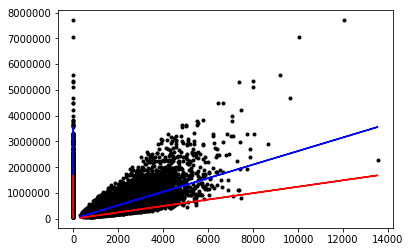

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [61]:
test_predictions_initial_weights = predict_output(simple_test_feature_matrix, [0., 0.])
test_predictions_0_penalty = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
test_predictions_high_penalty = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)

Compute the RSS on the TEST data for the following three sets of weights:

* The initial weights (all zeros)
* The weights learned with no regularization
* The weights learned with high regularization

Which weights perform best?

In [62]:
RSS = lambda output, predictions : sum((output - predictions)**2)

In [63]:
print RSS(test_output, test_predictions_initial_weights)
print RSS(test_output, test_predictions_0_penalty)
print RSS(test_output, test_predictions_high_penalty)

1784273282524564.0
275723634597546.25
694642100913952.2


### QUIZ QUESTIONS

What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?
Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?
What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?

In [47]:
print simple_weights_0_penalty
print simple_weights_high_penalty

[-1.63113501e-01  2.63024369e+02]
[  9.76730383 124.57217565]


## Running a multiple regression with L2 penalty

Let us now consider a model with 2 features: ['sqft_living', 'sqft_living15'].

First, create Numpy versions of your training and test data with these two features.

In [48]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [49]:
# We need to re-inialize the weights, since we have one extra parameter.
# Let us also set the step size and maximum number of iterations.
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [50]:
# First, let's consider no regularization. Set the l2_penalty to 0.0 and run
# your ridge regression algorithm to learn the weights of your model.
# Call your weights:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights,
                                                               step_size, 0.0, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  4056752331500973.0
Iteration = 3
Cost function =  2529565114333592.0
Iteration = 4
Cost function =  1838556694275926.8
Iteration = 5
Cost function =  1525675575208603.8
Iteration = 6
Cost function =  1383789498674793.8
Iteration = 7
Cost function =  1319232606276634.5
Iteration = 8
Cost function =  1289648872028920.8
Iteration = 9
Cost function =  1275884724079266.8
Iteration = 10
Cost function =  1269278807577156.8
Iteration = 20
Cost function =  1257812386316614.8
Iteration = 30
Cost function =  1251954571266786.2
Iteration = 40
Cost function =  1246755423155437.5
Iteration = 50
Cost function =  1242139508748821.0
Iteration = 60
Cost function =  1238041401137188.0
Iteration = 70
Cost function =  1234403013463993.5
Iteration = 80
Cost function =  1231172774976820.2
Iteration = 90
Cost function =  1228304900059555.0
Iteration = 100
Cost function =  1225758739

In [51]:
# Next, let's consider high regularization. Set the l2_penalty to 1e11 and run your
# ridge regression algorithm to learn the weights of your model. Call your weights:

multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights,
                                                                  step_size, 1e11, max_iterations)

Starting gradient descent with l2_penalty = 1e+11
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  4460489790285892.0
Iteration = 3
Cost function =  3796674468844608.5
Iteration = 4
Cost function =  3648319530437361.0
Iteration = 5
Cost function =  3615091103216103.0
Iteration = 6
Cost function =  3607602742514732.0
Iteration = 7
Cost function =  3605886322161656.0
Iteration = 8
Cost function =  3605474874533296.0
Iteration = 9
Cost function =  3605365167765576.0
Iteration = 10
Cost function =  3605329402184649.0
Iteration = 20
Cost function =  3605294281022695.0
Iteration = 30
Cost function =  3605293537267100.0
Iteration = 40
Cost function =  3605293082749905.0
Iteration = 50
Cost function =  3605292631106358.0
Iteration = 60
Cost function =  3605292179491500.5
Iteration = 70
Cost function =  3605291727877070.0
Iteration = 80
Cost function =  3605291276262785.0
Iteration = 90
Cost function =  3605290824648642.5
Iteration = 100
Cost function =  36052903

Compute the RSS on the TEST data for the following three sets of weights:

* The initial weights (all zeros)
* The weights learned with no regularization
* The weights learned with high regularization

Which weights perform best?

In [59]:
test_predictions_initial_weights = predict_output(test_feature_matrix, [0., 0., 0.])
test_predictions_0_penalty = predict_output(test_feature_matrix, multiple_weights_0_penalty)
test_predictions_high_penalty = predict_output(test_feature_matrix, multiple_weights_high_penalty)

In [60]:
print RSS(test_output, test_predictions_initial_weights)
print RSS(test_output, test_predictions_0_penalty)
print RSS(test_output, test_predictions_high_penalty)

1784273282524564.0
274067618287244.97
500404800579555.8


In [56]:
# Predict the house price for the 1st house in the test set using the no regularization
# and high regularization models. (Remember that python starts indexing from 0.) How far
# is the prediction from the actual price? Which weights perform best for the 1st house?

In [57]:
test_output[0]

310000.0

In [64]:
predict_output(test_feature_matrix, multiple_weights_0_penalty)[0]

387465.47646474396

In [65]:
predict_output(test_feature_matrix, multiple_weights_high_penalty)[0]

270453.5303048586

### QUIZ QUESTIONS

* What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?
* What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?
* We make prediction for the first house in the test set using two sets of weights (no regularization vs high regularization). Which weights make better prediction for that particular house?

In [66]:
print multiple_weights_0_penalty
print multiple_weights_high_penalty

[ -0.35743482 243.0541689   22.41481594]
[ 6.7429658  91.48927361 78.43658768]
